In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load Google play data as a DataFrame named df_google
df_google=pd.read_csv('/content/drive/MyDrive/Google-Playstore.csv')

# Getting to know the data

In [4]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

# Missing values in the data

In [5]:
df_google.isnull().sum().sort_values(ascending = False)

Developer Website    760835
Privacy Policy       420953
Released              71053
Rating                22883
Rating Count          22883
Minimum Android        6530
Size                    196
Currency                135
Installs                107
Minimum Installs        107
Developer Id             33
Developer Email          31
App Name                  2
App Id                    0
Price                     0
Free                      0
Maximum Installs          0
Last Updated              0
Content Rating            0
Category                  0
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

# **Data Cleaning and Visualization**

Text(0.5, 1.0, 'Missing null values')

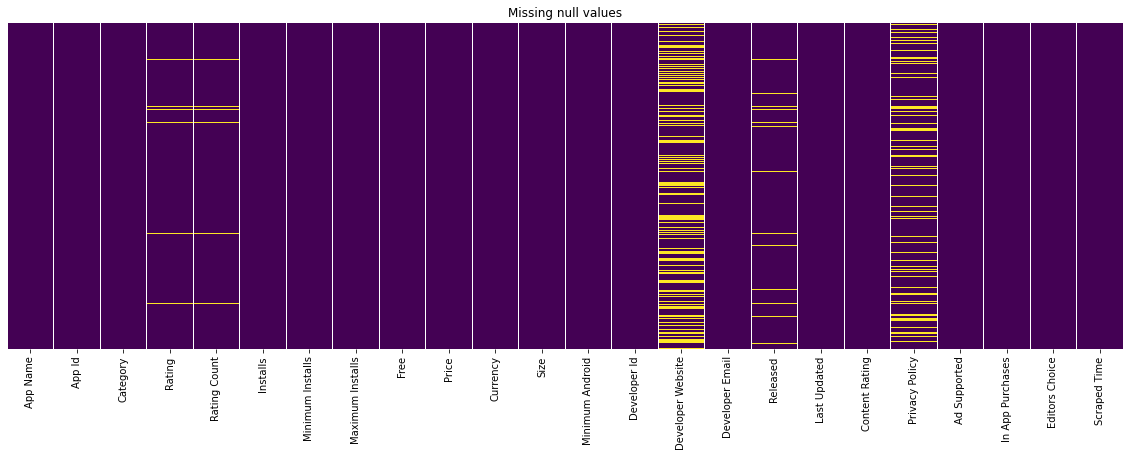

In [6]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,6)
sns.heatmap(df_google.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing null values")

In [7]:
missing_percentage_google = df_google.isnull().sum().sort_values(ascending = False)/len(df_google)
missing_percentage_google

Developer Website    3.289466e-01
Privacy Policy       1.819988e-01
Released             3.071972e-02
Rating               9.893452e-03
Rating Count         9.893452e-03
Minimum Android      2.823242e-03
Size                 8.474049e-05
Currency             5.836717e-05
Installs             4.626139e-05
Minimum Installs     4.626139e-05
Developer Id         1.426753e-05
Developer Email      1.340283e-05
App Name             8.646988e-07
App Id               0.000000e+00
Price                0.000000e+00
Free                 0.000000e+00
Maximum Installs     0.000000e+00
Last Updated         0.000000e+00
Content Rating       0.000000e+00
Category             0.000000e+00
Ad Supported         0.000000e+00
In App Purchases     0.000000e+00
Editors Choice       0.000000e+00
Scraped Time         0.000000e+00
dtype: float64

Text(0.5, 1.0, 'Missig percentage of null values in google play apps')

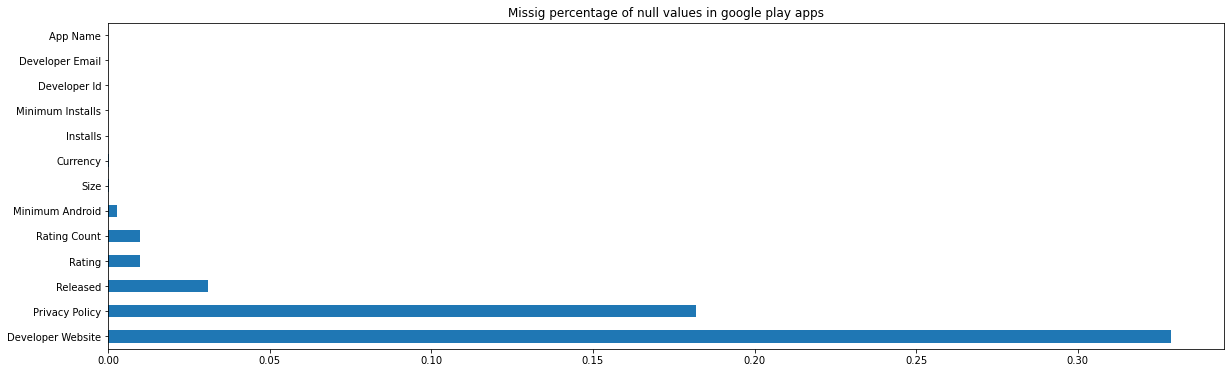

In [8]:
missing_percentage_google = missing_percentage_google[missing_percentage_google != 0] # Only the missing data
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,6)
missing_percentage_google.plot(kind = 'barh')
plt.title("Missig percentage of null values in google play apps")

**The columns having highest percentage of null values are :**

1. Developer Website
2. Privacy Policy

**we can drop the small null values for the columns**


*  Size
*  Currency


*   Installs
*  Minimum Installs
*  Developer Id
*  Developer Email

**The rest are important columns so it is good to fill the null values**
* Rating
* Rating count
* Minimum Andriod
* Released

In [9]:
df_google.dropna(subset = ['App Name','Size','Currency','Installs','Minimum Installs','Developer Id','Developer Email'], inplace = True)

In [10]:
df_google.isnull().sum()

App Name                  0
App Id                    0
Category                  0
Rating                22572
Rating Count          22572
Installs                  0
Minimum Installs          0
Maximum Installs          0
Free                      0
Price                     0
Currency                  0
Size                      0
Minimum Android        6530
Developer Id              0
Developer Website    760716
Developer Email           0
Released              70748
Last Updated              0
Content Rating            0
Privacy Policy       420845
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

**Exploring the numerical columns**

In [11]:
df_google['Installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', '50,000,000+',
       '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

In [12]:
df_google['Installs'] = df_google['Installs'].str.split('+').str[0]    # reomoves the + symbol
df_google['Installs'].replace(',','', regex=True, inplace=True) #replace the commas ',' in the install column
df_google['Installs'] = df_google['Installs'].astype(int)              # converting it to the int type

In [13]:
df_google['Installs'].unique()

array([         10,        5000,          50,         100,        1000,
               500,       50000,       10000,           1,      500000,
            100000,           5,    10000000,     1000000,     5000000,
                 0,   100000000,    50000000,  1000000000,   500000000,
        5000000000, 10000000000])

In [14]:
df_google['Size'].unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)

**The Size of data can be in GB, MB and KB let's convert the data into the size in MB**

In [15]:
df_google['Size'] = df_google['Size'].apply(lambda x: str(x).replace('Varies with device', '0') if 'Varies with device' in str(x) else x)

In [16]:
df_google['Size'] = df_google['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)

In [17]:
df_google['Size'] = df_google['Size'].apply(lambda x: str(x).replace(',', '.') if ',' in str(x) else x)

In [18]:
df_google['Size'] = df_google['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

In [19]:
df_google['Size'] = df_google['Size'].apply(lambda x: float(str(x).replace('G', '')) * 1000 if 'G' in str(x) else x)

In [20]:
df_google['Size'] = df_google['Size'].apply(lambda x: float(x))

In [21]:
df_google.dtypes['Size']

dtype('float64')

**Getting the released year out of Released column** 

In [22]:
df_google['Released'].dtypes

dtype('O')

In [23]:
df_google['Released']

0          Feb 26, 2020
1          May 21, 2020
2           Aug 9, 2019
3          Sep 10, 2018
4          Feb 21, 2020
               ...     
2312939             NaN
2312940    Jan 17, 2018
2312941    Aug 19, 2018
2312942     Aug 1, 2016
2312943     Aug 9, 2019
Name: Released, Length: 2312548, dtype: object

In [24]:
df_google['Released']=pd.to_datetime(df_google['Released'])

In [25]:
df_google['year_released']=df_google['Released'].dt.year

In [26]:
df_google['year_released']

0          2020.0
1          2020.0
2          2019.0
3          2018.0
4          2020.0
            ...  
2312939       NaN
2312940    2018.0
2312941    2018.0
2312942    2016.0
2312943    2019.0
Name: year_released, Length: 2312548, dtype: float64

**Creataing the column type for free and paid Apps by using the Free column, it's helpfull while dealing with the paid and Free Apps**

In [27]:
df_google['Type'] = np.where(df_google['Free'] == True,'Free','Paid')

In [28]:
df_google['Type'].value_counts()

Free    2267619
Paid      44929
Name: Type, dtype: int64

In [29]:
df_google.drop(['Free'],axis=1, inplace= True)

In [30]:
df_google.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Price', 'Currency', 'Size',
       'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time', 'year_released', 'Type'],
      dtype='object')

**cleaning the content Rating column**

In [31]:
df_google['Content Rating'].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

we have varies Categories in the content Rating column :
* Everyone
* Teen
* Mature 17+
* Everyone 10+
* Unrated
* Adults only 18+
Now, we makes this Categories to a simple 3 Categories for better understanding :
Everyone, Teen, Adults

* Mature 17+ ----> to Adults
* Everyone 10+ ----> to Teen
* Unrated ----> to Everyone
* Adults only 18+ -> to Adults

In [32]:
df_google["Content Rating"]=df_google["Content Rating"].replace("Unrated","Everyone")
df_google["Content Rating"]=df_google["Content Rating"].replace("Everyone 10+","Teen")
df_google["Content Rating"]=df_google["Content Rating"].replace("Mature 17+","Adults")
df_google["Content Rating"]=df_google["Content Rating"].replace("Adults only 18+","Adults")

In [33]:
df_google['Content Rating'].unique()

array(['Everyone', 'Teen', 'Adults'], dtype=object)

In [34]:
df_google['Rating Type'] = 'NoRatingProvided'
df_google.loc[(df_google['Rating Count'] > 0) & (df_google['Rating Count'] <= 10000.0),'Rating Type'] = 'Less than 10K'
df_google.loc[(df_google['Rating Count'] > 10000) & (df_google['Rating Count'] <= 500000.0),'Rating Type'] = 'Between 10K and 500K'
df_google.loc[(df_google['Rating Count'] > 500000) & (df_google['Rating Count'] <= 138557570.0),'Rating Type'] = 'More than 500K'
df_google['Rating Type'].value_counts()

Less than 10K           1192801
NoRatingProvided        1082303
Between 10K and 500K      35779
More than 500K             1665
Name: Rating Type, dtype: int64

In [35]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312548 entries, 0 to 2312943
Data columns (total 26 columns):
 #   Column             Dtype         
---  ------             -----         
 0   App Name           object        
 1   App Id             object        
 2   Category           object        
 3   Rating             float64       
 4   Rating Count       float64       
 5   Installs           int64         
 6   Minimum Installs   float64       
 7   Maximum Installs   int64         
 8   Price              float64       
 9   Currency           object        
 10  Size               float64       
 11  Minimum Android    object        
 12  Developer Id       object        
 13  Developer Website  object        
 14  Developer Email    object        
 15  Released           datetime64[ns]
 16  Last Updated       object        
 17  Content Rating     object        
 18  Privacy Policy     object        
 19  Ad Supported       bool          
 20  In App Purchases   bool 

# **Visualization Insights and Correlations**

In [36]:
df_google['Category'].value_counts()

Education                  241068
Music & Audio              154897
Tools                      143971
Business                   143749
Entertainment              138261
Lifestyle                  118321
Books & Reference          116716
Personalization             89207
Health & Fitness            83497
Productivity                79681
Shopping                    75240
Food & Drink                73918
Travel & Local              67279
Finance                     65450
Arcade                      53779
Puzzle                      51151
Casual                      50790
Communication               48157
Sports                      47473
Social                      44724
News & Magazines            42799
Photography                 35552
Medical                     32063
Action                      27539
Maps & Navigation           26721
Simulation                  23268
Adventure                   23193
Educational                 21302
Art & Design                18536
Auto & Vehicle

**some categories of interest like Music and Eduction are given with different labels: there are both 'Music & Audio' and 'Music' labels as well as 'Education' and 'Educational' for education. They should be merged together to represent a single category.**

In [37]:
# Collapse 'Music' and 'Music & Audio' into 'Music'
df_google['Category'] = df_google['Category'].str.replace('Music & Audio', 'Music')
# Collapse 'Educational' and 'Education' into 'Education'
df_google['Category'] = df_google['Category'].str.replace('Educational', 'Education')

**What are the top 10 Categories that are installed from the Google Play Store ?**

In [38]:
top_cat_installed=df_google.sort_values(by =['Maximum Installs'],ascending = False)

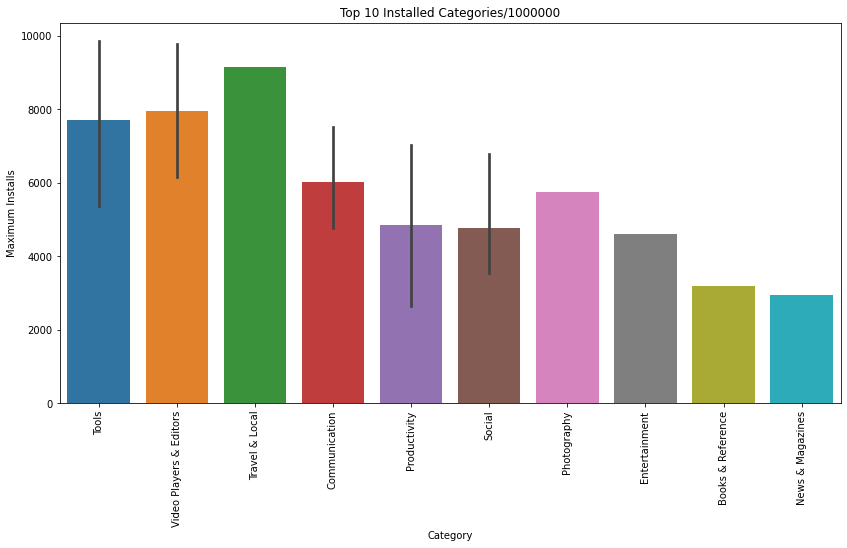

In [39]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.title("Top 10 Installed Categories/1000000")
sns.barplot(x = top_cat_installed.Category[:25],y= top_cat_installed['Maximum Installs']/1000000)

**What are the top 10 Categories that are in Google Play Store ?**

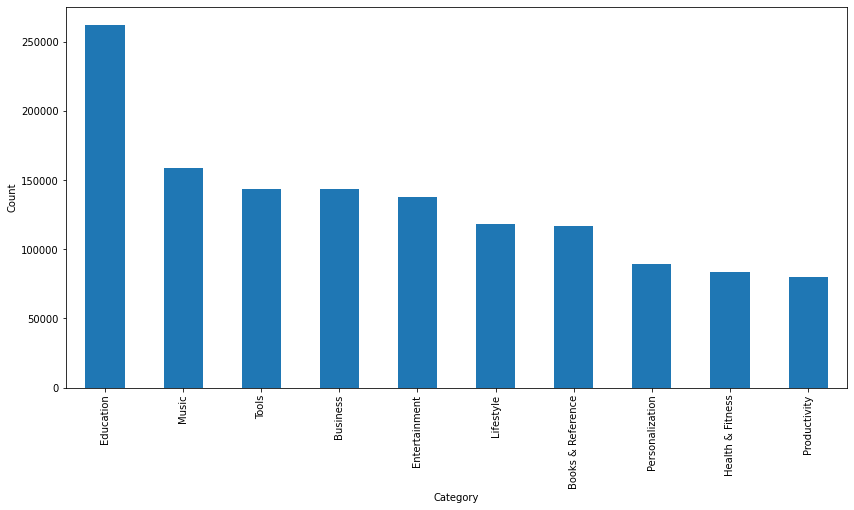

In [40]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
cat_sorted=df_google['Category'].value_counts()
plt.xlabel("Category")
plt.ylabel("Count")
cat_sorted[:10].plot.bar()

**Observation :**

**As we can see from the above two plots: Maxinum number of apps present in google play store comes under Education Music, Tools and Business etc., Categories but as per the installation scenario it is different. Maximum installed apps comes under Tools, Video players & Editors ,Travel & Local, Communication etc.**

Text(0.5, 1.0, 'Distribution of Rating')

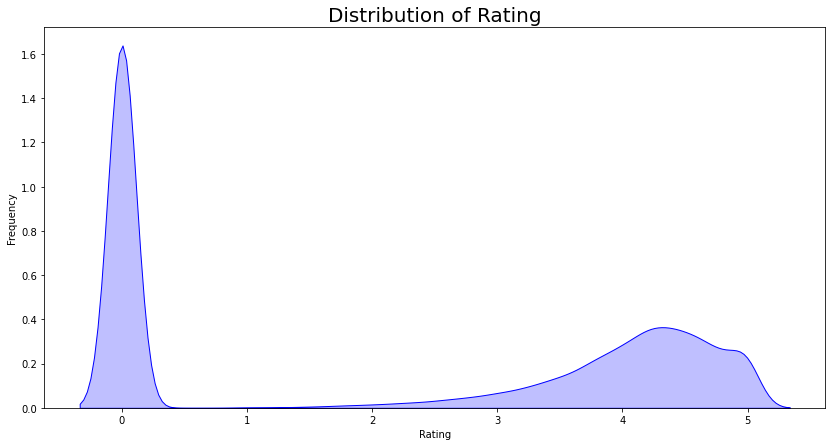

In [41]:
plt.figure(figsize=(14,7))
g = sns.kdeplot(df_google.Rating, color="Blue", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

**What is the percentage of rating count/ installs ?**

how many people rate the app after installing it ? 

In [42]:
#df_google['Rating Count']/df_google['Maximum Installs'].plot.bar()

**Observation :**

**From the above plot we can see that most people does not give a rating,But one more thing that comes out from this graph as well is that people tend to give 4+ rating the most.**

**What is the highest rated Category?**

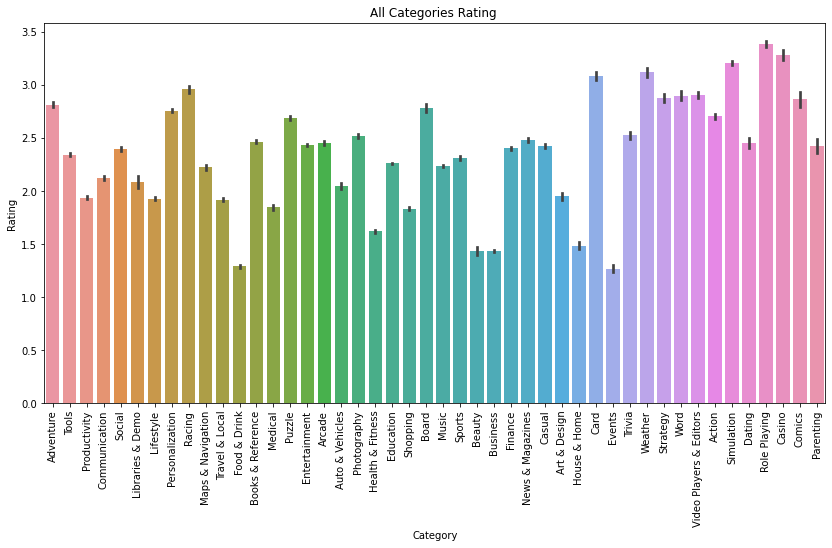

In [43]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Highest Rated Category")
plt.ylabel("Number of applications")
plt.title("All Categories Rating ")
sns.barplot(x = df_google.Category,y = df_google.Rating)

**From the above plot we can see that Role Playing is the highest Rated category**

**How does the size of the Application impacts the Installation ?**

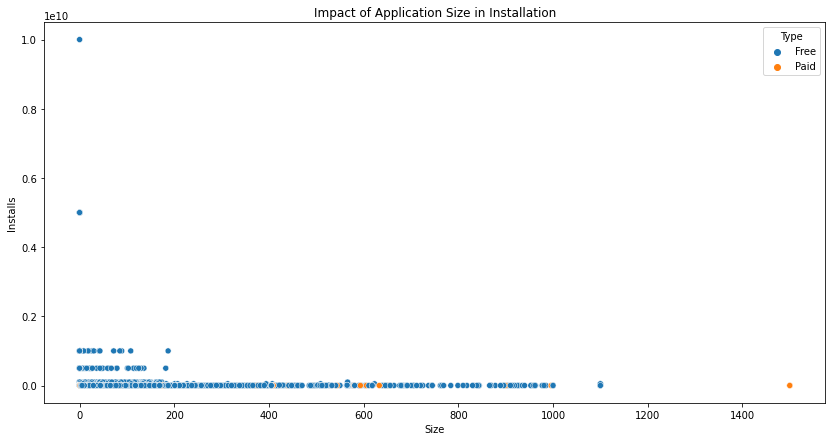

In [44]:
plt.figure(figsize=(14,7))
plt.xlabel("Size")
plt.ylabel("Installs")
plt.title("Impact of Application Size in Installation")
sns.scatterplot(x = 'Size',y = 'Installs', hue='Type', data=df_google)

**from the above plot we can see that size impacts the number of installations. Applications with large size are less installed by the user.**

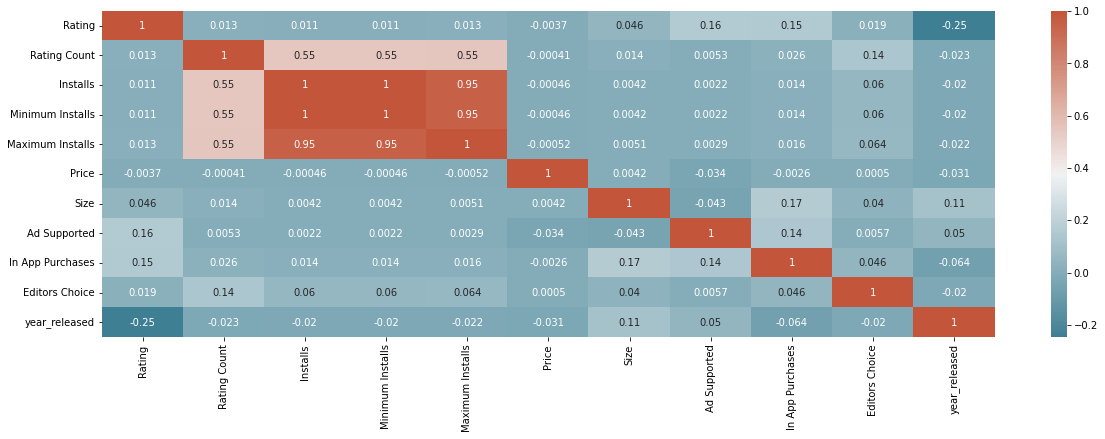

In [45]:
corr=df_google.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.set(rc={'figure.figsize':(12,10)})

**Observation :**

**Factors like AdSupport and InappPurchases are correlated to app rating. So we can say that if the app provides customer support and have subscription plans we can engage more customers. We can also see from the same graph that the editor's choice plays a important role as well. With high editor choice we can see high ratings count and high installs.**

# **Preparing the data for the model**

**Encoding**

In [46]:
#encoding objects columns
cleanup_nums = {
                "Type": {"Free": 0, "Paid": 1}              
                }
df_google = df_google.replace(cleanup_nums)


In [47]:
df_google['Type'] = df_google['Type'].astype('bool')

In [48]:
df_google = pd.get_dummies(df_google,columns=['Category','Content Rating'],drop_first=True)

In [49]:
df_google.head(10)

,App Name,App Id,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,Size,...,Category_Sports,Category_Strategy,Category_Tools,Category_Travel & Local,Category_Trivia,Category_Video Players & Editors,Category_Weather,Category_Word,Content Rating_Everyone,Content Rating_Teen
0,Gakondo,com.ishakwe.gakondo,0.0,0.0,10,10.0,15,0.0,USD,10.0,...,0,0,0,0,0,0,0,0,1,0
1,Ampere Battery Info,com.webserveis.batteryinfo,4.4,64.0,5000,5000.0,7662,0.0,USD,2.9,...,0,0,1,0,0,0,0,0,1,0
2,Vibook,com.doantiepvien.crm,0.0,0.0,50,50.0,58,0.0,USD,3.7,...,0,0,0,0,0,0,0,0,1,0
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,5.0,5.0,10,10.0,19,0.0,USD,1.8,...,0,0,0,0,0,0,0,0,1,0
4,GROW.me,com.horodyski.grower,0.0,0.0,100,100.0,478,0.0,USD,6.2,...,0,0,1,0,0,0,0,0,1,0
5,IMOCCI,com.imocci,0.0,0.0,50,50.0,89,0.0,USD,46.0,...,0,0,0,0,0,0,0,0,0,1
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,4.5,12.0,1000,1000.0,2567,0.0,USD,2.5,...,0,0,0,0,0,0,0,0,1,0
7,The Everyday Calendar,com.mozaix.simoneboard,2.0,39.0,500,500.0,702,0.0,USD,16.0,...,0,0,0,0,0,0,0,0,1,0
8,WhatsOpen,com.whatsopen.app,0.0,0.0,10,10.0,18,0.0,USD,1.3,...,0,0,0,0,0,0,0,0,0,1
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,4.7,820.0,50000,50000.0,62433,0.0,USD,3.5,...,0,0,0,0,0,0,0,0,1,0


**Dropping unneccecry columns**

In [50]:
#dropping columns that can not be encoded or don't want it to affect 
df_google=df_google.drop(['App Id','Currency','Minimum Android','Developer Website','Developer Email','Last Updated','Scraped Time','App Name','Developer Id','Rating Type','Released'],axis=1)

**Privacy column**

In [51]:
#dealing with privacy policy column
df_google['Privacy Policy'].isnull().sum()

420845

In [52]:
df_google["Privacy Policy"] = df_google["Privacy Policy"].fillna(0)

In [53]:
#any roe with privacy ploicy is true, it means it has privacy policy
df_google['Privacy Policy']=df_google['Privacy Policy'].str.contains('http', regex=True)

In [54]:
df_google["Privacy Policy"] = df_google["Privacy Policy"].fillna(0)

In [55]:
df_google['Privacy Policy'].value_counts()

True    1891189
0        421359
Name: Privacy Policy, dtype: int64

In [56]:
df_google['Privacy Policy'] = df_google['Privacy Policy'].astype('bool')

**Filling NAN values**

In [57]:
df_google['year_released'].isnull().sum()

70748

In [58]:
df_google["year_released"] = df_google["year_released"].fillna(0)

In [59]:
df_google['year_released'] = df_google['year_released'].astype('int')

In [60]:
df_google['Rating'].isnull().sum()

22572

In [61]:
df_google["Rating"] = df_google["Rating"].fillna(0)

In [62]:
df_google['Rating Count'].isnull().sum()

22572

In [63]:
df_google["Rating Count"] = df_google["Rating Count"].fillna(0)

In [64]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312548 entries, 0 to 2312943
Data columns (total 60 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Rating                            float64
 1   Rating Count                      float64
 2   Installs                          int64  
 3   Minimum Installs                  float64
 4   Maximum Installs                  int64  
 5   Price                             float64
 6   Size                              float64
 7   Privacy Policy                    bool   
 8   Ad Supported                      bool   
 9   In App Purchases                  bool   
 10  Editors Choice                    bool   
 11  year_released                     int64  
 12  Type                              bool   
 13  Category_Adventure                uint8  
 14  Category_Arcade                   uint8  
 15  Category_Art & Design             uint8  
 16  Category_Auto & Vehicles          ui

In [65]:
df_google.head(10)

,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Size,Privacy Policy,Ad Supported,In App Purchases,...,Category_Sports,Category_Strategy,Category_Tools,Category_Travel & Local,Category_Trivia,Category_Video Players & Editors,Category_Weather,Category_Word,Content Rating_Everyone,Content Rating_Teen
0,0.0,0.0,10,10.0,15,0.0,10.0,True,False,False,...,0,0,0,0,0,0,0,0,1,0
1,4.4,64.0,5000,5000.0,7662,0.0,2.9,True,True,False,...,0,0,1,0,0,0,0,0,1,0
2,0.0,0.0,50,50.0,58,0.0,3.7,True,False,False,...,0,0,0,0,0,0,0,0,1,0
3,5.0,5.0,10,10.0,19,0.0,1.8,False,True,False,...,0,0,0,0,0,0,0,0,1,0
4,0.0,0.0,100,100.0,478,0.0,6.2,True,False,False,...,0,0,1,0,0,0,0,0,1,0
5,0.0,0.0,50,50.0,89,0.0,46.0,True,False,True,...,0,0,0,0,0,0,0,0,0,1
6,4.5,12.0,1000,1000.0,2567,0.0,2.5,True,True,False,...,0,0,0,0,0,0,0,0,1,0
7,2.0,39.0,500,500.0,702,0.0,16.0,True,False,False,...,0,0,0,0,0,0,0,0,1,0
8,0.0,0.0,10,10.0,18,0.0,1.3,True,False,False,...,0,0,0,0,0,0,0,0,0,1
9,4.7,820.0,50000,50000.0,62433,0.0,3.5,True,True,False,...,0,0,0,0,0,0,0,0,1,0


#**Scaling Data**


In [66]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df_google)

In [67]:
scaled?

In [68]:
df_scaled=pd.DataFrame(scaled)

In [69]:
df_scaled.columns=df_google.columns

In [70]:
df_scaled?

In [71]:
df_scaled.columns

Index(['Rating', 'Rating Count', 'Installs', 'Minimum Installs',
       'Maximum Installs', 'Price', 'Size', 'Privacy Policy', 'Ad Supported',
       'In App Purchases', 'Editors Choice', 'year_released', 'Type',
       'Category_Adventure', 'Category_Arcade', 'Category_Art & Design',
       'Category_Auto & Vehicles', 'Category_Beauty', 'Category_Board',
       'Category_Books & Reference', 'Category_Business', 'Category_Card',
       'Category_Casino', 'Category_Casual', 'Category_Comics',
       'Category_Communication', 'Category_Dating', 'Category_Education',
       'Category_Entertainment', 'Category_Events', 'Category_Finance',
       'Category_Food & Drink', 'Category_Health & Fitness',
       'Category_House & Home', 'Category_Libraries & Demo',
       'Category_Lifestyle', 'Category_Maps & Navigation', 'Category_Medical',
       'Category_Music', 'Category_News & Magazines', 'Category_Parenting',
       'Category_Personalization', 'Category_Photography',
       'Category_Prod

In [72]:
#Splitting the data ti train, validation and test sets
from sklearn.model_selection import train_test_split
x= df_scaled.drop(["Rating","Installs","Minimum Installs","Maximum Installs","Rating Count"],axis=1)
y= df_scaled['Rating']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [73]:
# no. of rows 2312548
test_data_size = 0.1*2312548
test_data_size

231254.80000000002

In [74]:
train_data_size=0.9*2312548
train_data_size

2081293.2

In [75]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(2081293, 55) (2081293,) (231255, 55) (231255,)


In [76]:
y_train?

In [77]:
x_train.head(10)

,Price,Size,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,year_released,Type,Category_Adventure,Category_Arcade,...,Category_Sports,Category_Strategy,Category_Tools,Category_Travel & Local,Category_Trivia,Category_Video Players & Editors,Category_Weather,Category_Word,Content Rating_Everyone,Content Rating_Teen
945716,0.0,0.004533,1.0,0.0,0.0,0.0,0.998516,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2292301,0.0,0.008667,1.0,0.0,0.0,0.0,0.999010,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1593979,0.0,0.002467,1.0,1.0,1.0,0.0,0.996536,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
129571,0.0,0.002400,1.0,1.0,0.0,0.0,0.998516,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
92443,0.0,0.000327,1.0,0.0,0.0,0.0,0.999010,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1140200,0.0,0.004000,0.0,0.0,0.0,0.0,0.999010,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2311505,0.0,0.012000,1.0,1.0,0.0,0.0,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
308542,0.0,0.015333,1.0,1.0,0.0,0.0,0.999505,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2201793,0.0,0.062667,1.0,0.0,1.0,0.0,0.999010,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1932319,0.0,0.007333,1.0,1.0,0.0,0.0,0.999505,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [78]:
y_train.head(10)

945716     0.00
2292301    0.78
1593979    0.96
129571     0.70
92443      1.00
1140200    0.00
2311505    0.78
308542     0.88
2201793    0.88
1932319    0.76
Name: Rating, dtype: float64

# **lightgbm**

In [79]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
model = LGBMRegressor()
# fit the model on the whole dataset
model.fit(x_train, y_train)
ypred = model.predict(x_test)

In [81]:
#Error Measurements
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,ypred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))

Mean Absolute Error: 0.3443124355765185
Mean Squared Error: 0.14810783600598337
Root Mean Squared Error: 0.3848478088881154


In [82]:
#t-test
from scipy import stats
a = y_test
b = ypred
t2 = stats.ttest_ind(a,b)
t2

Ttest_indResult(statistic=-0.10358691127462509, pvalue=0.9174972199828103)

A t-test is an inferential statistic used to determine if there is a significant difference between the means of two groups and how they are related.

A large t-score, or t-value, indicates that the groups are different while a small t-score (colser to zero) indicates that the groups are similar.

**Here the t-score is -0.1 and it means that the y_test(original rating) and the ypred(predicted rating) are similar.**

